# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook 1 : Data analytics



## Learning Objectives



At the end of the experiment, you will be able to :


* understand the requirements for a “clean” dataset, ready for use in statistical analysis

* use Python libraries like Pandas, Numpy, and Matplotlib to perform the  data-preprocessing steps

* obtain probability and statistics based insights from the data


## Dataset

The dataset chosen for this experiment is the **Play Store** dataset which is  publicly available and created with this [methodology](https://nycdatascience.com/blog/student-works/google-play-store-everything-that-you-need-to-know-about-the-android-market/)  

This dataset consists of 10841 records. Each record is made up of 13 fields.

**For example**, Each record consists of App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver.

## Problem Statement

Before we can derive any meaningful insights from the Play Store data, it is essential to pre-process the data and make it suitable for further analysis. This pre-processing step forms a major part of data wrangling (or data munging) and ensures better quality data. It consists of the transformation and mapping of data from a "raw" data form into another format so that it is more valuable for a variety of downstream purposes such as analytics. Data analysts typically spend a sizeable amount of time in the process of data wrangling, compared to the actual analysis of the data.

After data munging is performed, several actionable insights can be derived from the Play Store apps data. Such insights could help to unlock the enormous potential to drive app-making businesses to success.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/googleplaystore.csv

#### Import required packages

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

#### Load the dataset

In [ ]:
# YOUR CODE HERE
df_ = pd.read_csv("googleplaystore.csv")
df_.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# df_["Installs"]

# df_corr = df[["Rating", "Installs", "Reviews"]].corr(numeric_only=True)
# df_corr

In [ ]:
# Dataframe insights
# select any line and press ctrl+shift+enter to run the selection only
df_.shape
df_.columns
df_.info()
df_.isnull().sum()
df_.sample(5)
df_.describe()
df_.describe(include='all')
df_.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Pre-processing

### Task 1: Data Cleaning

* Check whether there are any null values and figure out how you want to handle them?
  
    **Hint:** isnan(), dropna(), fillna()
* If there is any duplication of a record, how would you like to handle it?

    Hint: [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Are there any non-English apps? And how to filter them?

* In the size column, multiply 1,000,000 with M in the cell and multiply by 1000 if we have K in the cell.

In [ ]:
# Remove duplicates
df_.shape  # Shape of orig_df_ (10841, 13)

df_.drop_duplicates(inplace=True)
df = df_ # Just Creating a copy
df.shape # new shape (10358, 13)

(10358, 13)

In [ ]:
# column-wise null values
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Null value columns alongwith fill-value type

|Column Name|counts|replacing with|
|----------|-------------|--------------|
|Rating|1474|mean of the rating valus|
|Type|1|"Free"|
|Content Rating|1|Shifing the row by 1|
|Category|1|ART_AND_DESIGN|
|Genres|1|Art & Design;Creativity|
|Current Ver|8|Mode (Highest frequency)|
|Android Ver|3|(Highest frequency)|
|Installs|1|(Highest frequency)|

In [ ]:
rating_mean = df['Rating'].mean()
rating_mean

4.189542336669291

In [ ]:
df["Rating"].isna().sum()
df["Rating"].unique()
df["Rating"].nunique()
df["Rating"].dtype

dtype('float64')

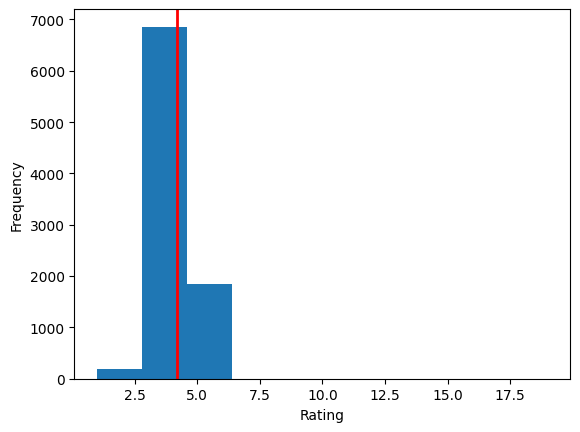

In [ ]:
rating_mean = df['Rating'].mean()

df['Rating'].plot(kind='hist',bins=10)
plt.axvline(rating_mean, color='red', linewidth=2, linestyle='solid')
plt.xlabel("Rating")
plt.show()

In [ ]:
# df['Rating'].mean()
df.groupby('Category').agg('mean')

<ipython-input-75-7247393461fa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Category').agg('mean')


,Rating
Category,
1.9,19.000000
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.347458
BUSINESS,4.102593
COMICS,4.155172
COMMUNICATION,4.151466
DATING,3.971698


In [ ]:
# rating_mean = df["Rating"].mean().round(2)
# df["Rating"].fillna(0, inplace=True)
df_g = df.groupby('Category').agg(['max', 'min', 'mean'])
df_g

<ipython-input-76-a6fd9548ddd8>:3: FutureWarning: ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_g = df.groupby('Category').agg(['max', 'min', 'mean'])


Rating                 
                       max   min       mean
Category                                   
1.9                   19.0  19.0  19.000000
ART_AND_DESIGN         5.0   3.2   4.358065
AUTO_AND_VEHICLES      4.9   2.1   4.190411
BEAUTY                 4.9   3.1   4.278571
BOOKS_AND_REFERENCE    5.0   2.7   4.347458
BUSINESS               5.0   1.0   4.102593
COMICS                 5.0   2.8   4.155172
COMMUNICATION          5.0   1.0   4.151466
DATING                 5.0   1.0   3.971698
EDUCATION              4.9   3.5   4.375969
ENTERTAINMENT          4.7   3.0   4.136036
EVENTS                 5.0   2.9   4.435556
FAMILY                 5.0   1.0   4.191153
FINANCE                5.0   1.0   4.127445
FOOD_AND_DRINK         5.0   1.7   4.164151
GAME                   5.0   1.0   4.281285
HEALTH_AND_FITNESS     5.0   1.4   4.261450
HOUSE_AND_HOME         4.8   2.8   4.164706
LIBRARIES_AND_DEMO     5.0   3.1   4.178462
LIFESTYLE              5.0   1.5   4.096066
MAPS_AND_NAVIGATION    4.9   1.9   4.051613
MEDICAL                5.0   1.0   4.182450
NEWS_AND_MAGAZINES     5.0   1.7   4.128505
PARENTING              5.0   2.0   4.300000
PERSONALIZATION        5.0   2.5   4.333871
PHOTOGRAPHY            5.0   2.0   4.182895
PRODUCTIVITY           5.0   1.0   4.201796
SHOPPING               5.0   1.6   4.251485
SOCIAL                 5.0   1.9   4.254918
SPORTS                 5.0   1.5   4.225175
TOOLS                  5.0   1.0   4.047411
TRAVEL_AND_LOCAL       5.0   2.2   4.094146
VIDEO_PLAYERS          4.9   1.8   4.063750
WEATHER                4.8   3.3   4.244000

In [ ]:
# filling the null values of Rating with the mean value of the rating column
# rating_mean = df["Rating"].mean().round(2)
rating_mean = df.groupby('Category')['Rating'].agg('mean').to_frame()
rating_mean


,Rating
Category,
1.9,19.000000
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.347458
BUSINESS,4.102593
COMICS,4.155172
COMMUNICATION,4.151466
DATING,3.971698


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df_['Rating'].mean()

4.189542336669291

In [ ]:
df['Rating'].mean() == df_['Rating'].mean()

True

In [ ]:
df['Rating'] = df["Rating"].fillna(df.groupby('Category')["Rating"].transform('mean'))
df['Rating'].to_frame()

,Rating
0,4.10000
1,3.90000
2,4.70000
3,4.50000
4,4.30000
...,...
10836,4.50000
10837,5.00000
10838,4.18245
10839,4.50000


In [ ]:
df.groupby("Category")["Rating"].agg('mean').to_frame()

,Rating
Category,
1.9,19.000000
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.347458
BUSINESS,4.102593
COMICS,4.155172
COMMUNICATION,4.151466
DATING,3.971698


In [ ]:
# df["Rating"].fillna(rating_mean, inplace=True)

In [ ]:
df["Rating"].isna().sum()
df["Rating"].astype('float')

0        4.10000
1        3.90000
2        4.70000
3        4.50000
4        4.30000
          ...   
10836    4.50000
10837    5.00000
10838    4.18245
10839    4.50000
10840    4.50000
Name: Rating, Length: 10358, dtype: float64

In [ ]:
# filling the null values of Type with "Free"
df["Type"].unique()

df[df["Type"].isna()]
df[df["Type"]=='0']
df[df["Type"].isin([np.nan, '0'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.191153,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.000000,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df["Type"].fillna("Free", inplace=True)
df["Type"].isna().sum()

0

In [ ]:
# English_bool = df_filled_dropDuplicates.App.map(lambda x: x.isascii())
# print(English_bool)
# df_filled_dropDuplicates_english = df_filled_dropDuplicates.copy()
# df_filled_dropDuplicates_english = df_filled_dropDuplicates_english[English_bool]
# df_filled_dropDuplicates_english.info()

In [ ]:
# filling the null values of Content rating
df[df["Content Rating"].isna()]
# Or
df.loc[df["Content Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# To impute df['Category']= mean('Category') AND shift the values of other columns right.
# Step 0: get the mean of the df['Category'] values

Category_mode = df['Category'].mode().tolist()
#print(Category_mode)
# Step 1: making a list of df columns
df_cols = list(df.columns)

#print(df_cols)
# Step 3: get the row list from the idx
row_list = df.loc[idx].values.tolist()[0][:]
#print(row_list,len(row_list))

# Step 4: Updating row_list by inserting the Category_mode and popping last item
idx_row_list = row_list.copy()
idx_row_list.pop(-1)
idx_row_list.insert(1,Category_mode[0])
#print(idx_row_list,len(idx_row_list))

# Step 5: making a dictionary with column name and values idx_dict{}
idx_dict = {key:value for key,value in zip(df_cols,idx_row_list)}
#print(idx_dict)

# Step 6: updating idx row with the idx_dict
df.iloc[idx[0]]= idx_dict

In [ ]:
# fix_row = df.loc[df["Content Rating"].isna()]
# df_1 = fix_row.shift(1)
# df_1
df.loc[10472] = df.loc[10472].shift(1)
df.loc[[10472]]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,None,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [ ]:
# Switch the values of "App" & "Category"
df.loc[10472, "App"], df.loc[10472, "Category"]= df.loc[10472, "Category"], df.loc[10472, "App"]


In [ ]:
# shifting the index 10472 right with one column
df.loc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,None,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [ ]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
df["Rating"] = df["Rating"].astype(float)

In [ ]:
df["Content Rating"].unique()
df[df["Category"].isna()]
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', None],
      dtype=object)

In [ ]:
# filling the null values of Category with "ART_AND_DESIGN"
df["Category"].fillna("ART_AND_DESIGN", inplace=True)
df['Category'].isnull().value_counts()

False    10358
Name: Category, dtype: int64

In [ ]:
# filling the null values of Category with "Art & Design;Creativity"
df[df["Genres"].isna()]
df["Genres"].unique()
df["Genres"].fillna("Art & Design;Creativity", inplace=True)
df['Genres'].isnull().value_counts()

False    10358
Name: Genres, dtype: int64

In [ ]:
# filling the null values of Category with "Varies with device" (Mode)
df[df["Current Ver"].isna()]
df["Current Ver"].unique()
df["Current Ver"].nunique()
df["Current Ver"].value_counts()
df["Current Ver"].mode()
df["Current Ver"].fillna(df["Current Ver"].value_counts().idxmax(), inplace=True)
df['Current Ver'].isnull().value_counts()

False    10358
Name: Current Ver, dtype: int64

In [ ]:
df["Current Ver"].value_counts().idxmax()

'Varies with device'

In [ ]:
# filling the null values of Android ver with "4.1 and up" (Mode)
df[df["Android Ver"].isna()]
df["Android Ver"].unique()
df["Android Ver"].nunique()
df["Android Ver"].value_counts()
df["Android Ver"].fillna(df["Android Ver"].value_counts().idxmax(), inplace=True)
df['Android Ver'].isnull().value_counts()

False    10358
Name: Android Ver, dtype: int64

In [ ]:
# drop the row with null value of Installs
df.dropna(inplace=True)


In [ ]:
# import string
# string.ascii_letters
# string.punctuation
# import re

# def is_non_english(app_name):
#   return bool(re.search(f'[^{string.ascii_letters}{string.digits}\s™®—_/–{string.punctuation}]', str(app_name)))
# filtered_df = df[df['app_name'].str.contains(r'^[a-zA-Z0-9\-_%\s]+$', na=False)]

In [ ]:
# English_bool = df_filled_dropDuplicates.App.map(lambda x: x.isascii())
# print(English_bool)
# df_filled_dropDuplicates_english = df_filled_dropDuplicates.copy()
# df_filled_dropDuplicates_english = df_filled_dropDuplicates_english[English_bool]
# df_filled_dropDuplicates_english.info()

**Or we can use str.extract() here**

In [ ]:
# df_non_english = df[df["App"].apply(is_non_english)]  (9781, 13)

# df_non_english = df[df["App"].apply(isEnglish)]
df_non_english = df[~df["App"].apply(lambda x:x.isascii())]
df_non_english.shape

(577, 13)

In [ ]:
df_non_english.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 4, 2018",Varies with device,Varies with device
88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 3, 2018",Varies with device,Varies with device
89,Zona Azul Digital Fácil SP CET - OFFICIAL São ...,AUTO_AND_VEHICLES,4.6,7880,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 10, 2018",4.6.5,Varies with device
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
161,ReadEra – free ebook reader,BOOKS_AND_REFERENCE,4.8,47303,21M,"1,000,000+",Free,0,Everyone,Books & Reference,"June 2, 2018",18.05.31+530,4.1 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
195,USPS MOBILE®,BUSINESS,3.9,16589,9.1M,"1,000,000+",Free,0,Everyone,Business,"June 14, 2018",4.9.10,4.0.3 and up
254,Invoice 2go — Professional Invoices and Estimates,BUSINESS,4.2,16422,28M,"1,000,000+",Free,0,Everyone,Business,"August 1, 2018",10.46.2,4.1 and up
300,Röhrich Werner Soundboard,COMICS,4.7,2249,32M,"500,000+",Free,0,Everyone,Comics,"November 16, 2017",1.08,4.0.3 and up


In [ ]:
import enchant

def isEnglish( str,per):
dictionary = enchant.Dict("en_US")

words = str.split(" ")
en_count = 0.0
for word in words:
  if dictionary.check(word.strip()):
    en_count += 1

percent = en_count/len(words) if len(words) != 0 else 0
if (percent >= per):
    return True
else
    return False;

In [ ]:
# In the size column, multiply 1,000,000 with M in the cell
# and multiply by 1000 if we have K in the cell.

def to_bytes(size):
  if "M" in size:
    return float(size.replace('M', ''))*10000000
  elif "K" in size:
    return float(size.replace('k', ''))*1000
  elif isinstance(size, str):
    return 0
  else:
    return float(size)

In [ ]:
df["Size"] = df["Size"].apply(to_bytes)

In [ ]:
df["Size"].sample(5)

4714     34000000.0
4856    990000000.0
6815     76000000.0
5773            0.0
3312     18000000.0
Name: Size, dtype: float64

In [ ]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  int64  
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10358 non-null  object 
 12  Android Ver     10358 non-null  object 
 13  z_score         10358 non-null  float64
 14  q_score         10358 non-null  float64
 15  iqr_outliers    10358 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(9)
memory usage: 1.5+ MB


## Visualization

### Task 2: Perform the  following tasks:

##### Exercise 1: Find the number of apps in various categories by using an appropriate plot.

In [ ]:
cat_grp = df.groupby('Category')
df.groupby('Type').size()

Type
Free    9593
Paid     765
dtype: int64

In [ ]:
# Or we can use the number count of apps in each category by value_counts
cat_counts = df['Category'].value_counts()
cat_counts.index, cat_counts.values


(Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PRODUCTIVITY',
        'PERSONALIZATION', 'LIFESTYLE', 'COMMUNICATION', 'FINANCE', 'SPORTS',
        'PHOTOGRAPHY', 'HEALTH_AND_FITNESS', 'SOCIAL', 'NEWS_AND_MAGAZINES',
        'TRAVEL_AND_LOCAL', 'BOOKS_AND_REFERENCE', 'SHOPPING', 'DATING',
        'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
        'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'WEATHER',
        'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'EVENTS', 'PARENTING', 'COMICS',
        'BEAUTY'],
       dtype='object'),
 array([1943, 1121,  843,  427,  408,  407,  388,  373,  366,  360,  351,
         322,  306,  280,  264,  237,  230,  224,  196,  175,  137,  130,
         124,  111,   85,   85,   82,   80,   66,   64,   60,   60,   53]))

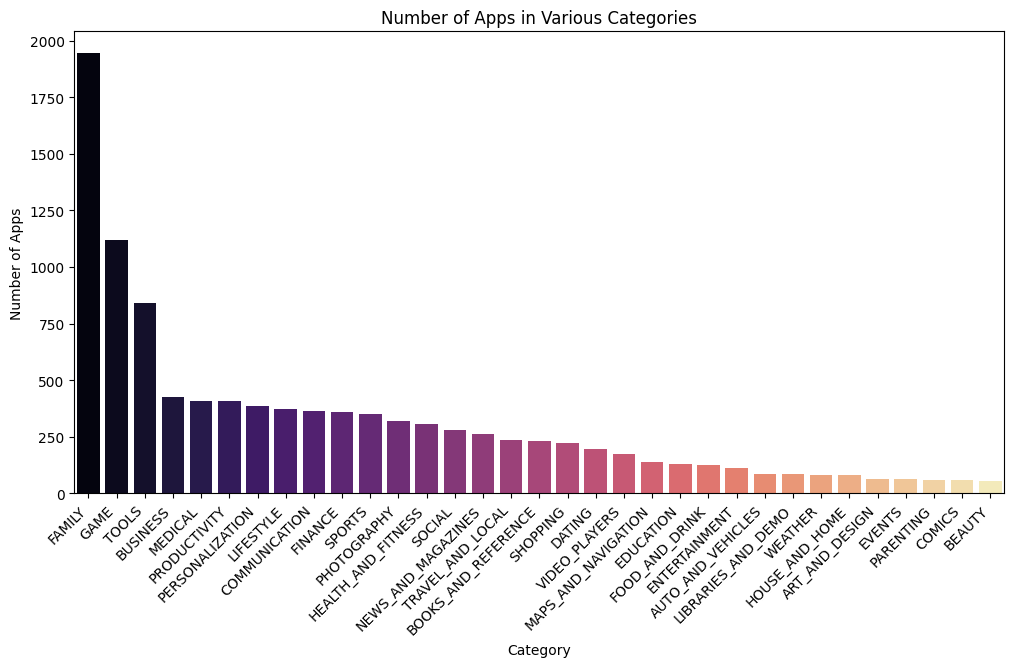

In [ ]:
# Plot the counts using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette='magma')

plt.title('Number of Apps in Various Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.show()

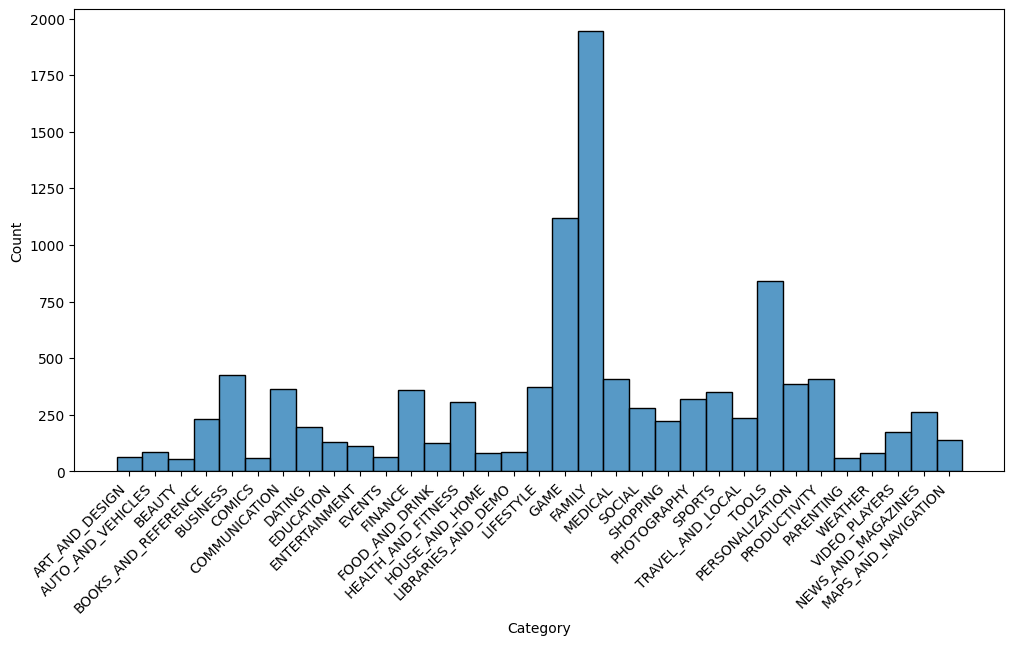

In [ ]:
# Or we can use histplot
plt.figure(figsize=(12, 6))
sns.histplot(x='Category', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

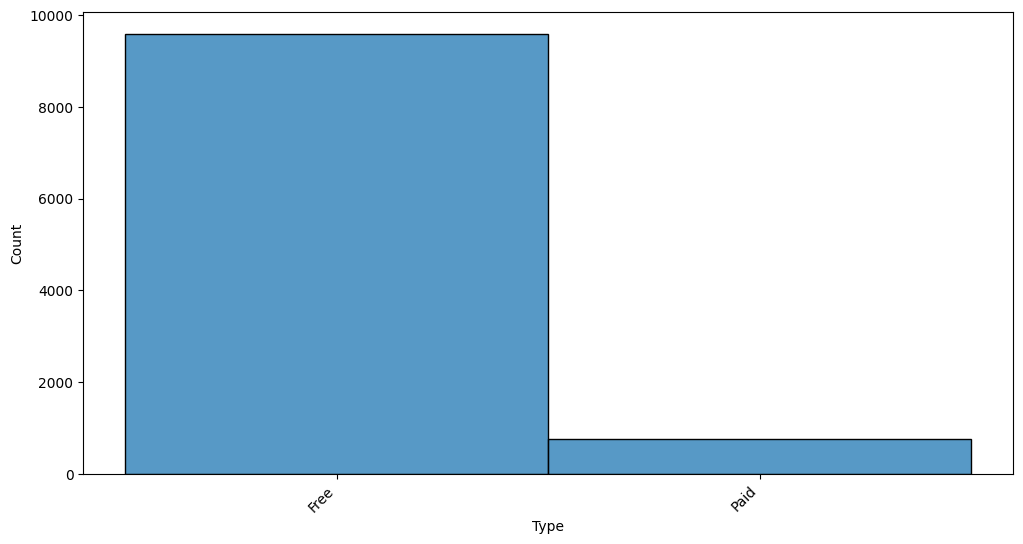

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Type', data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

##### Exercise 2: Explore the distribution of free and paid apps across different categories

**Hint:** Stacked Bar Graph, [link](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html)

In [ ]:
df.groupby('Type').size()

Type
Free    9593
Paid     765
dtype: int64

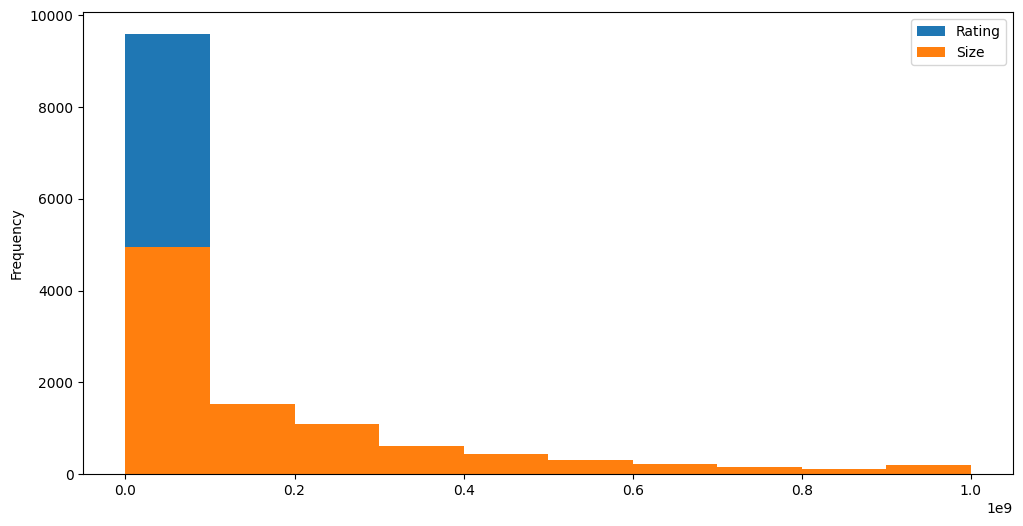

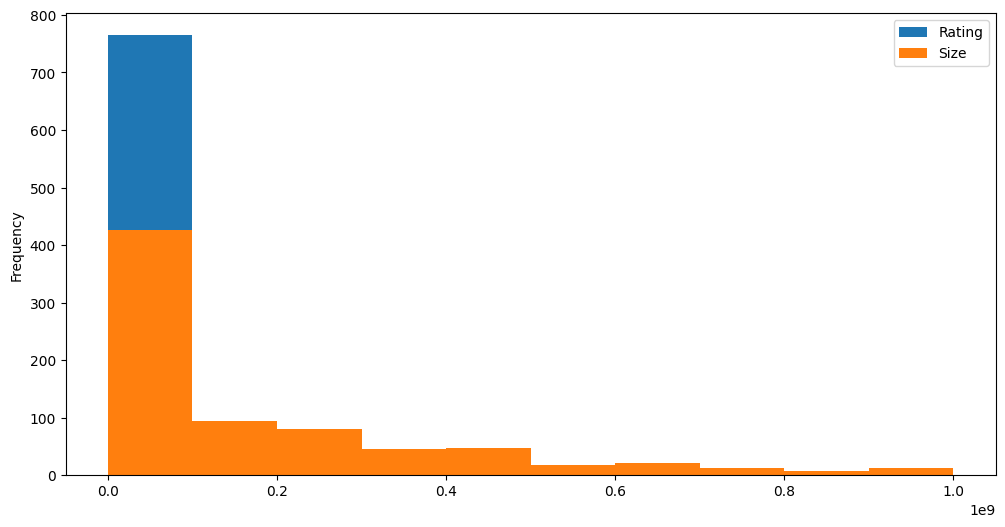

In [ ]:
df.groupby('Type').plot(figsize=(12, 6),kind="hist")
plt.show()

In [ ]:
cat_type_count = df.groupby(['Category', 'Type']).size()
cat_type_count.to_frame()
cat_type_count.unstack()

Type,Free,Paid
Category,,
ART_AND_DESIGN,63.0,3.0
AUTO_AND_VEHICLES,82.0,3.0
BEAUTY,53.0,NaN
BOOKS_AND_REFERENCE,202.0,28.0
BUSINESS,415.0,12.0
COMICS,60.0,NaN
COMMUNICATION,339.0,27.0
DATING,189.0,7.0
EDUCATION,126.0,4.0


In [ ]:
cat_type_count = df.groupby(['Category', 'Type']).size().unstack()

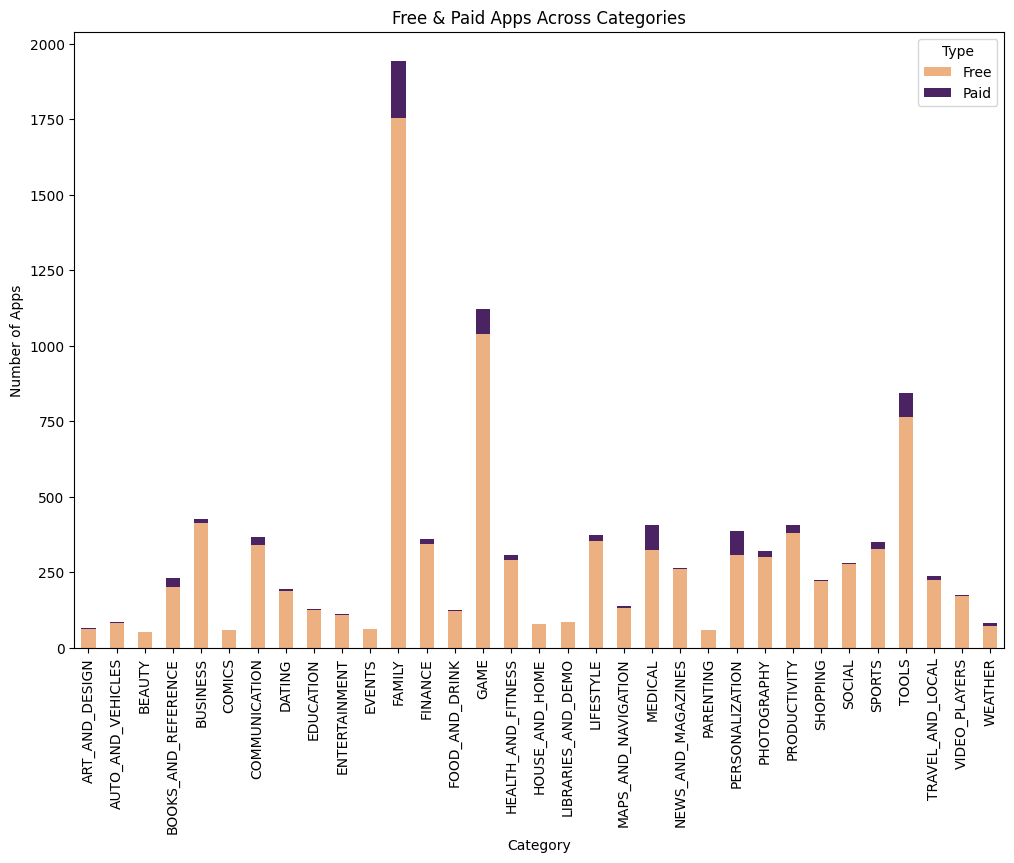

In [ ]:
cat_type_count.plot(figsize=(12, 8), kind='bar', stacked=True, colormap='flare')

plt.title('Free & Paid Apps Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')

plt.legend(title='Type', loc='upper right')
plt.xticks(rotation=90)
plt.show()

##### Exercise 3: Represent the distribution of app rating on a scale of 1-5 using an appropriate plot

**Hint:** histogram / strip plot

In [ ]:
df.groupby("Rating").size().to_frame()

,0
Rating,
1.0,16
1.2,1
1.4,3
1.5,3
1.6,4
...,...
4.6,768
4.7,484
4.8,228


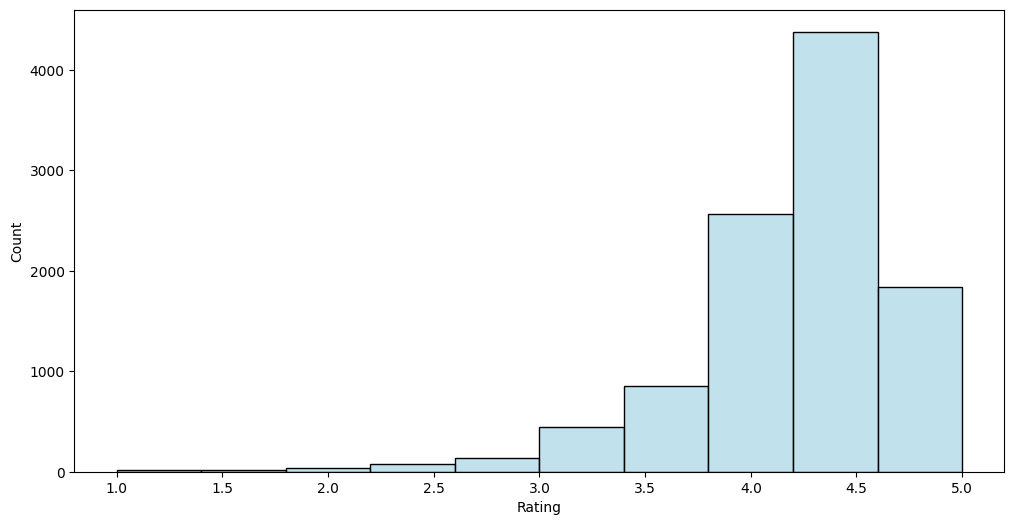

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Rating", bins=10, color='lightblue')
plt.show()


##### Exercise 4: Identify outliers of the rating column by plotting the boxplot category wise and handle them.

**Hint:** Removing outliers using Z-score, quantile [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

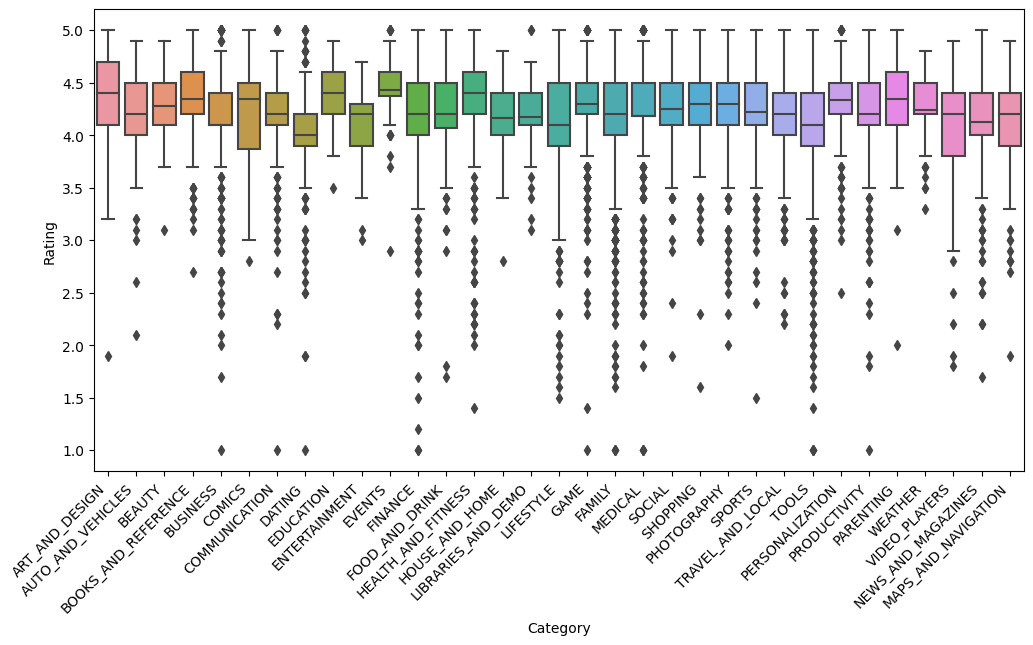

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Rating", data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Identifying outliers using Z-score
z = np.abs(df['Rating'] - df['Rating'].mean()) / df['Rating'].std()
df['z_score'] = z
df[df['z_score'] > 3]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,z_score
477,Calculator,DATING,2.6,57,62000000.0,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,3.265435
518,Just She - Top Lesbian Dating,DATING,1.9,953,190000000.0,100000,Free,0.00,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,4.706529
520,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,190000000.0,500000,Free,0.00,Mature 17+,Dating,"July 31, 2018",4.8.5,4.0.3 and up,3.471306
527,Sugar Daddy Dating App,DATING,2.5,277,57000000.0,100000,Free,0.00,Mature 17+,Dating,"December 4, 2017",3.0.0,4.1 and up,3.471306
611,MouseMingle,DATING,2.7,3,39000000.0,100,Free,0.00,Mature 17+,Dating,"July 17, 2018",1.0.0,4.4 and up,3.059565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10562,FK Atlantas,SPORTS,1.5,2,260000000.0,5,Free,0.00,Everyone,Sports,"February 21, 2018",1.0,4.1 and up,5.530012
10578,Check Lottery Tickets - Florida,FAMILY,2.0,27,310000000.0,5000,Free,0.00,Teen,Entertainment,"October 17, 2017",2.1,4.0.3 and up,4.500659
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,410000000.0,500,Free,0.00,Everyone,Tools,"December 12, 2017",1.0,4.2 and up,6.559365
10677,Pint - FN Theme,PERSONALIZATION,2.5,6,0.0,100,Free,0.00,Everyone,Personalization,"August 10, 2013",1.0,2.2 and up,3.471306


In [ ]:
# Identifying outliers using Z-score
z = (df['Rating'] - df['Rating'].mean()) / df['Rating'].std()
df['z_score'] = z
df[(df['z_score'] > 3) | (df['z_score'] < -3)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,z_score,q_score,iqr_outliers
477,Calculator,DATING,2.6,57,62000000.0,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,-3.265435,4.8,True
518,Just She - Top Lesbian Dating,DATING,1.9,953,190000000.0,100000,Free,0.00,Mature 17+,Dating,"July 18, 2018",6.3.7,5.0 and up,-4.706529,4.8,True
520,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,190000000.0,500000,Free,0.00,Mature 17+,Dating,"July 31, 2018",4.8.5,4.0.3 and up,-3.471306,4.8,True
527,Sugar Daddy Dating App,DATING,2.5,277,57000000.0,100000,Free,0.00,Mature 17+,Dating,"December 4, 2017",3.0.0,4.1 and up,-3.471306,4.8,True
611,MouseMingle,DATING,2.7,3,39000000.0,100,Free,0.00,Mature 17+,Dating,"July 17, 2018",1.0.0,4.4 and up,-3.059565,4.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10562,FK Atlantas,SPORTS,1.5,2,260000000.0,5,Free,0.00,Everyone,Sports,"February 21, 2018",1.0,4.1 and up,-5.530012,4.8,True
10578,Check Lottery Tickets - Florida,FAMILY,2.0,27,310000000.0,5000,Free,0.00,Teen,Entertainment,"October 17, 2017",2.1,4.0.3 and up,-4.500659,4.8,True
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,410000000.0,500,Free,0.00,Everyone,Tools,"December 12, 2017",1.0,4.2 and up,-6.559365,4.8,True
10677,Pint - FN Theme,PERSONALIZATION,2.5,6,0.0,100,Free,0.00,Everyone,Personalization,"August 10, 2013",1.0,2.2 and up,-3.471306,4.8,True


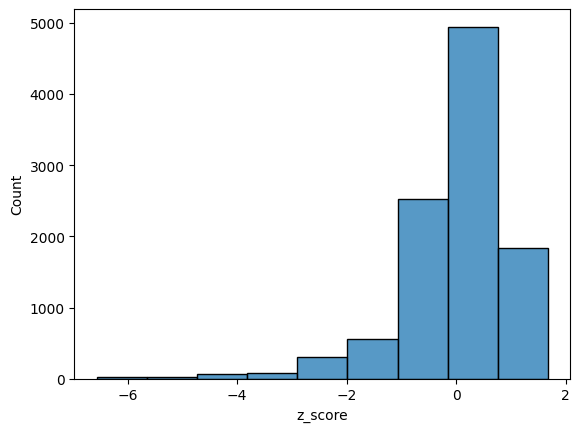

In [ ]:
sns.histplot(data=df, x="z_score", bins=9)
plt.show()

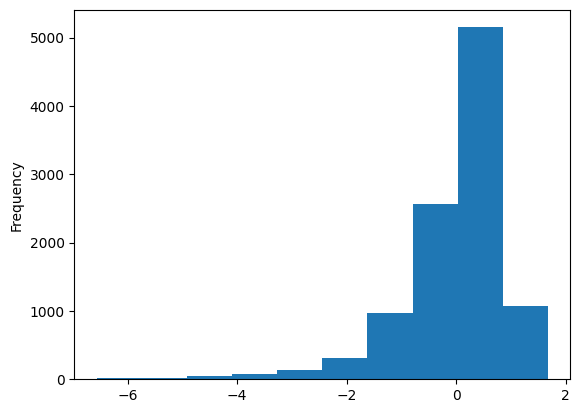

In [ ]:
df["z_score"].plot(kind='hist')
plt.show()

In [ ]:
# Removing outliers using quantile
critical_value_thres = 0.95
df['q_score'] = df['Rating'].quantile(critical_value_thres)
df[df['Rating'] > df['q_score']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,z_score,q_score
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,330000000.0,100000,Free,0.0,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up,1.469589,4.8
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,170000000.0,100000,Free,0.0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,1.469589,4.8
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,270000000.0,100000,Free,0.0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,1.469589,4.8
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,380000000.0,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up,1.469589,4.8
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,140000000.0,1000000,Free,0.0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up,1.469589,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,79000000.0,1000,Free,0.0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up,1.675459,4.8
10776,Monster Ride Pro,GAME,5.0,1,240000000.0,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up,1.675459,4.8
10801,Fr Ignacio Outreach,FAMILY,4.9,52,190000000.0,1000,Free,0.0,Everyone,Education,"January 19, 2018",1.0,4.4 and up,1.469589,4.8
10820,Fr. Daoud Lamei,FAMILY,5.0,22,86000000.0,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up,1.675459,4.8


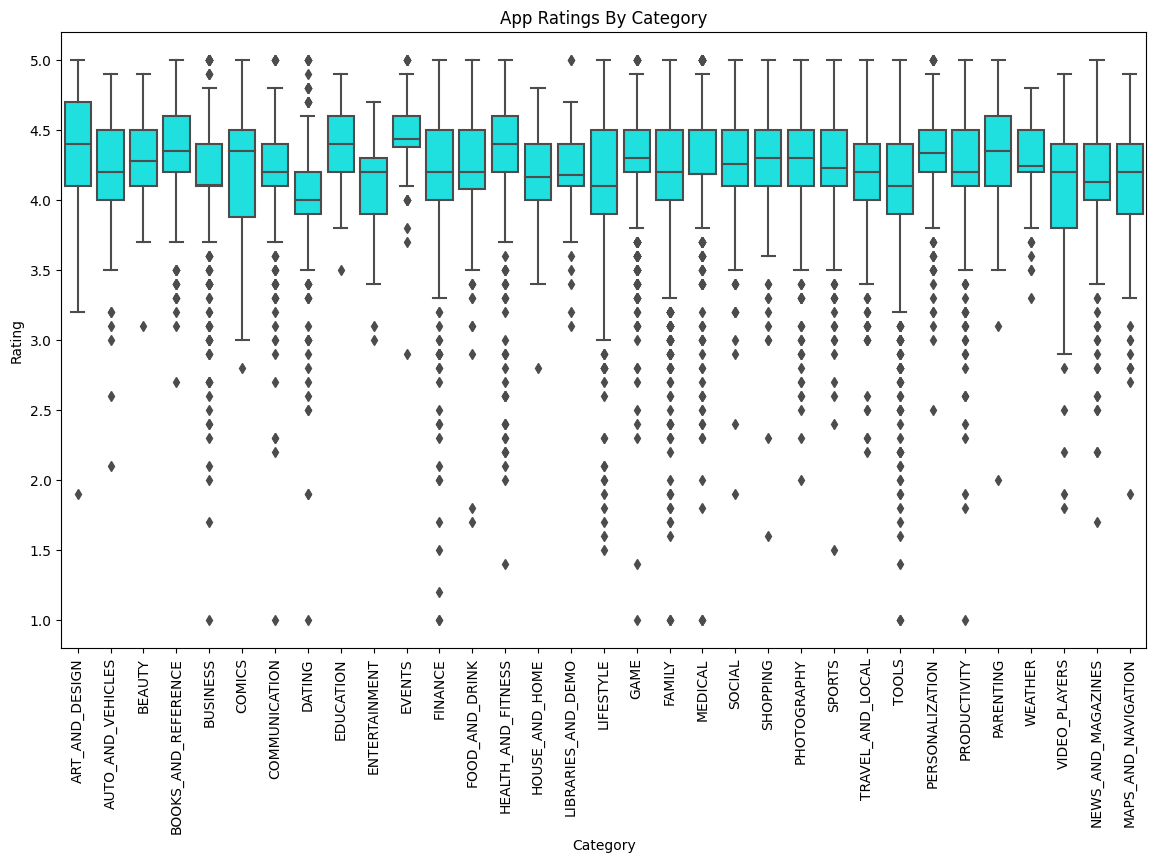

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="Category", y="Rating", color='aqua')
plt.title('App Ratings By Category')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Q1 = df['Rating'].quantile(.25)
Q3 = df['Rating'].quantile(.75)

IQR = Q3 - Q1
IQR

left_outliers = df['Rating'] < (Q1 - 1.5*IQR)
right_outliers = df['Rating'] > (Q3 + 1.5*IQR)
outliers = left_outliers | right_outliers

In [ ]:
df_outliers = df[outliers]
df_outliers
df_no_outliers = df[~outliers]
df_no_outliers
# df[df["iqr_outliers"]==True].shape
# df[df_no_outliers==True].shape

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,z_score,q_score,iqr_outliers
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10000,159,190000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,-0.177376,4.8,True
1,Coloring book moana,ART_AND_DESIGN,3.90000,967,140000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,-0.589117,4.8,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70000,87510,87000000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1.057847,4.8,True
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50000,215644,250000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.646106,4.8,True
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30000,967,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.234365,4.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50000,38,530000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0.646106,4.8,True
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00000,4,36000000.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,1.675459,4.8,True
10838,Parkinson Exercices FR,MEDICAL,4.18245,3,95000000.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,-0.007635,4.8,True
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50000,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0.646106,4.8,True


In [ ]:
df_no_outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,z_score,q_score,iqr_outliers
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,190000000.0,50000,Free,0.00,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,0.794988,4.8,False
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,92000000.0,100000,Free,0.00,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up,0.794988,4.8,False
43,Paint Splash!,ART_AND_DESIGN,3.8,2206,12000000.0,100000,Free,0.00,Everyone,Art & Design;Creativity,"April 15, 2018",1.46,4.1 and up,0.794988,4.8,False
51,Ultimate F1 Racing Championship,AUTO_AND_VEHICLES,3.8,284,570000000.0,100000,Free,0.00,Everyone,Auto & Vehicles,"July 26, 2018",3.0,4.1 and up,0.794988,4.8,False
71,SK Enca Direct Malls - Used Cars Search,AUTO_AND_VEHICLES,3.6,1379,160000000.0,500000,Free,0.00,Everyone,Auto & Vehicles,"August 2, 2018",2.2.21,4.2 and up,1.206729,4.8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10779,Fortune Quest: Savior,FAMILY,3.6,135,750000000.0,10000,Free,0.00,Everyone 10+,Role Playing,"June 1, 2018",1.022,4.4 and up,1.206729,4.8,False
10782,Trine 2: Complete Story,GAME,3.8,252,110000000.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,0.794988,4.8,False
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,130000000.0,10000,Free,0.00,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up,1.618470,4.8,False
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,23000000.0,100000,Free,0.00,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up,0.794988,4.8,False


##### Exercise 5: Plot the barplot of all the categories indicating no. of installs

In [ ]:
df["Installs"] = df["Installs"].str.replace(',', '').str.rstrip('+').astype(int)

In [ ]:
df.groupby("Installs").size().to_frame()

,0
Installs,
0,15
1,67
5,82
10,385
50,204
100,710
500,328
1000,891
5000,469


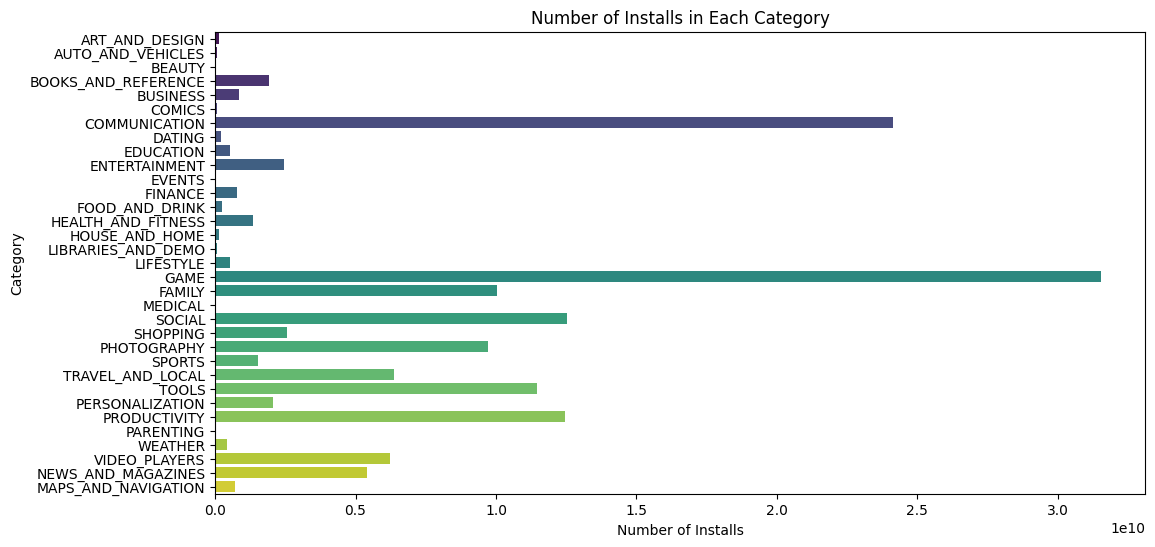

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
sns.barplot(data=df,x="Installs", y="Category", estimator=sum, errorbar=None, palette='viridis')

plt.xlabel('Number of Installs')
plt.ylabel('Category')
plt.title('Number of Installs in Each Category')
plt.show()

## Insights


### Task 3: Derive the below insights

##### Exercise 1: Does the price correlate with the size of the app?

  **Hint:** plot the scatterplot of `Size` and `Price`

In [ ]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)

<ipython-input-127-3d1d9481e45a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


In [ ]:
price_size_corr = df[["Price", "Size"]].corr(numeric_only=True)
price_size_corr

,Price,Size
Price,1.000000,-0.015124
Size,-0.015124,1.000000


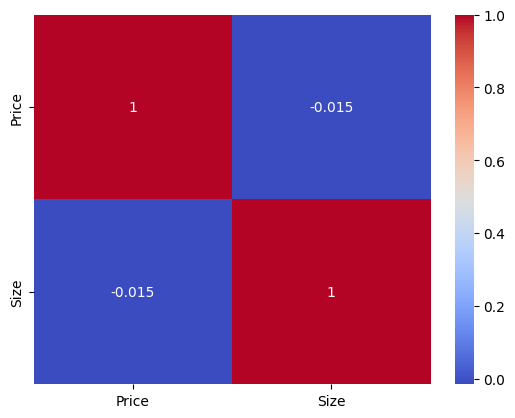

In [ ]:
sns.heatmap(data=price_size_corr, cmap = 'coolwarm', annot=True)
plt.show()

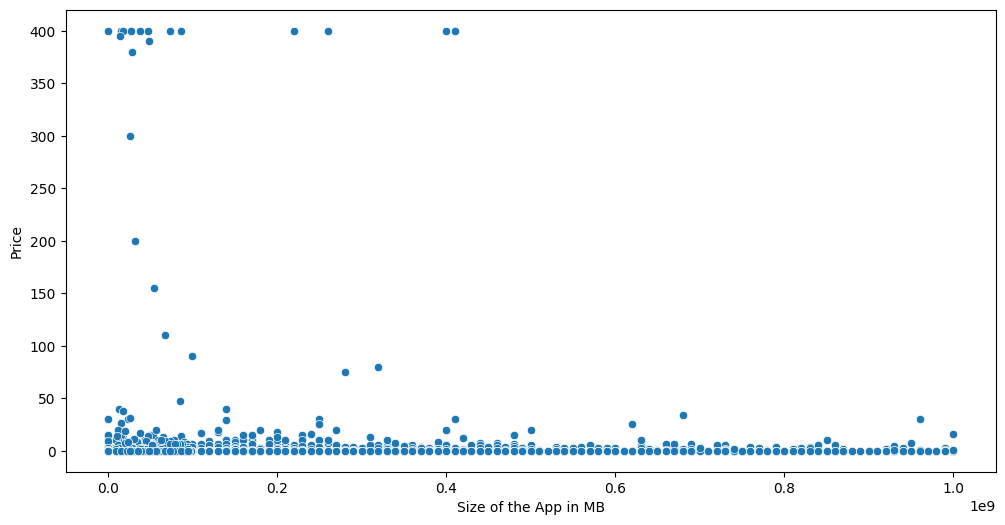

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Size", y="Price")

plt.xlabel("Size of the App in MB")
plt.ylabel("Price")
plt.show()

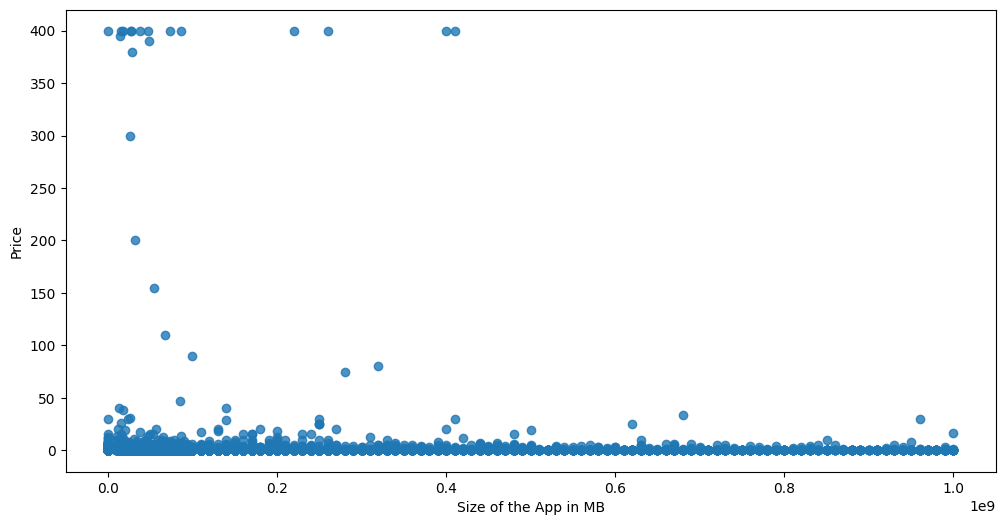

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(12,6))
sns.regplot(data=df, x="Size", y="Price")

plt.xlabel("Size of the App in MB")
plt.ylabel("Price")
plt.show()

In [ ]:
corr_df = df.corr(numeric_only=True)
corr_df

,Rating,Size,Installs,Price
Rating,1.000000,0.046503,0.051196,-0.020737
Size,0.046503,1.000000,0.000401,-0.015124
Installs,0.051196,0.000401,1.000000,-0.011146
Price,-0.020737,-0.015124,-0.011146,1.000000


<Axes: >

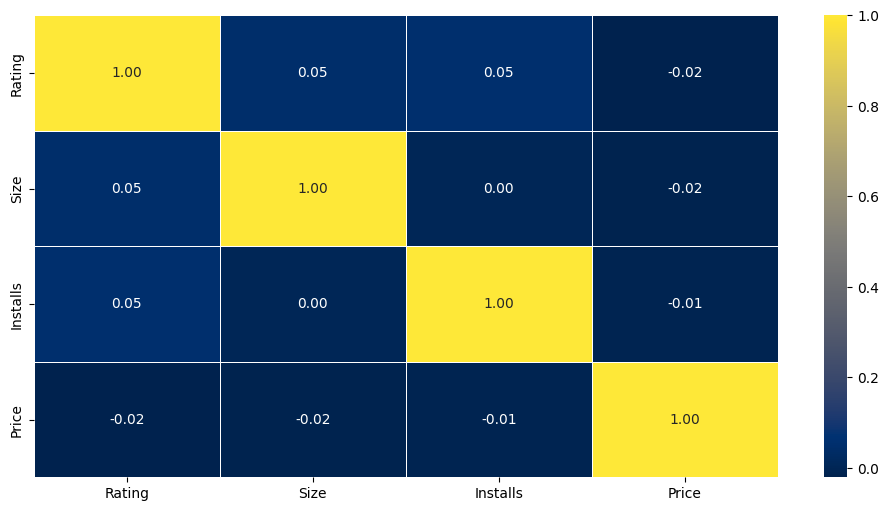

In [ ]:
fig,axes = plt.subplots(figsize=(12, 6))
sns.heatmap(data=corr_df, annot=True, linewidths=.4, fmt= '.2f',ax=axes, cmap='cividis')

##### Exercise 2: Find the popular app categories based on rating and no. of installs

**Hint:** [df.groupby.agg()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html); Taking the average rating could be another approach



In [ ]:
# YOUR CODE HERE
cat_install = df.groupby("Category")[["Rating", "Installs"]].mean()
# df.groupby("Category")[["Rating", "Installs"]].agg('mean')
sorted_data = cat_install.sort_values(by="Installs", ascending=False).reset_index()
sorted_data

,Category,Rating,Installs
0,COMMUNICATION,4.151466,6.598983e+07
1,SOCIAL,4.254918,4.469239e+07
2,VIDEO_PLAYERS,4.063750,3.555430e+07
3,PRODUCTIVITY,4.201796,3.062185e+07
4,PHOTOGRAPHY,4.182895,3.019021e+07
5,GAME,4.281285,2.813918e+07
6,TRAVEL_AND_LOCAL,4.094146,2.684341e+07
7,ENTERTAINMENT,4.136036,2.212306e+07
8,NEWS_AND_MAGAZINES,4.128505,2.042886e+07
9,TOOLS,4.047411,1.358573e+07


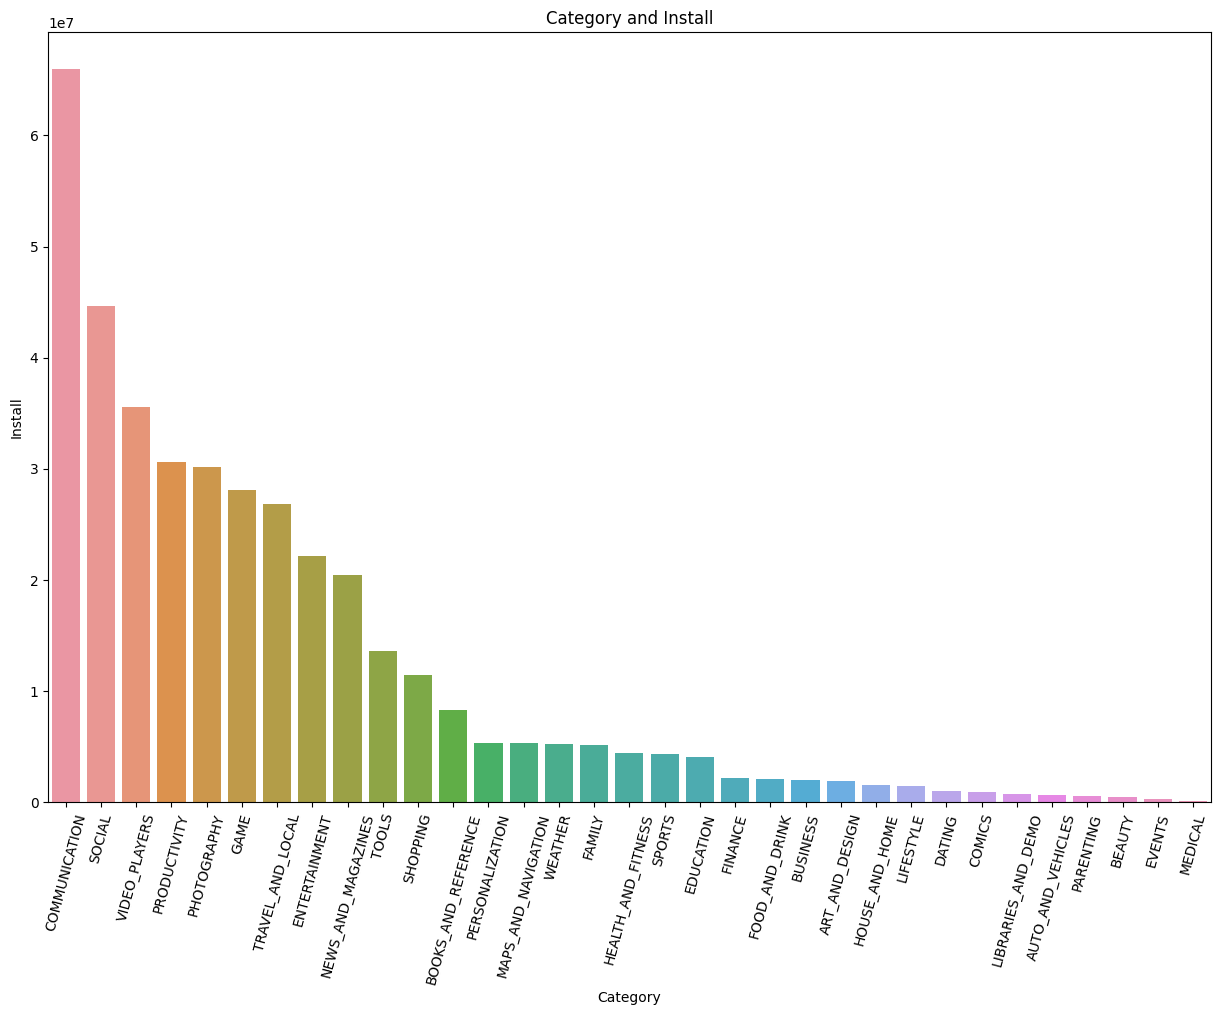

In [ ]:
fig, axes = plt.subplots(figsize=(15, 10))
sns.barplot(x='Category', y='Installs', data=sorted_data, ax=axes)

plt.xticks(rotation=75)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Category and Install")
plt.show()

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# # YOUR CODE HERE
cat_reviews = df.groupby("Category")[["Rating", "Reviews"]].mean(numeric_only=True)
cat_reviews
sorted_data_1 = cat_reviews.sort_values(by="Reviews", ascending=False).reset_index()
sorted_data_1

KeyError: ignored

ValueError: ignored

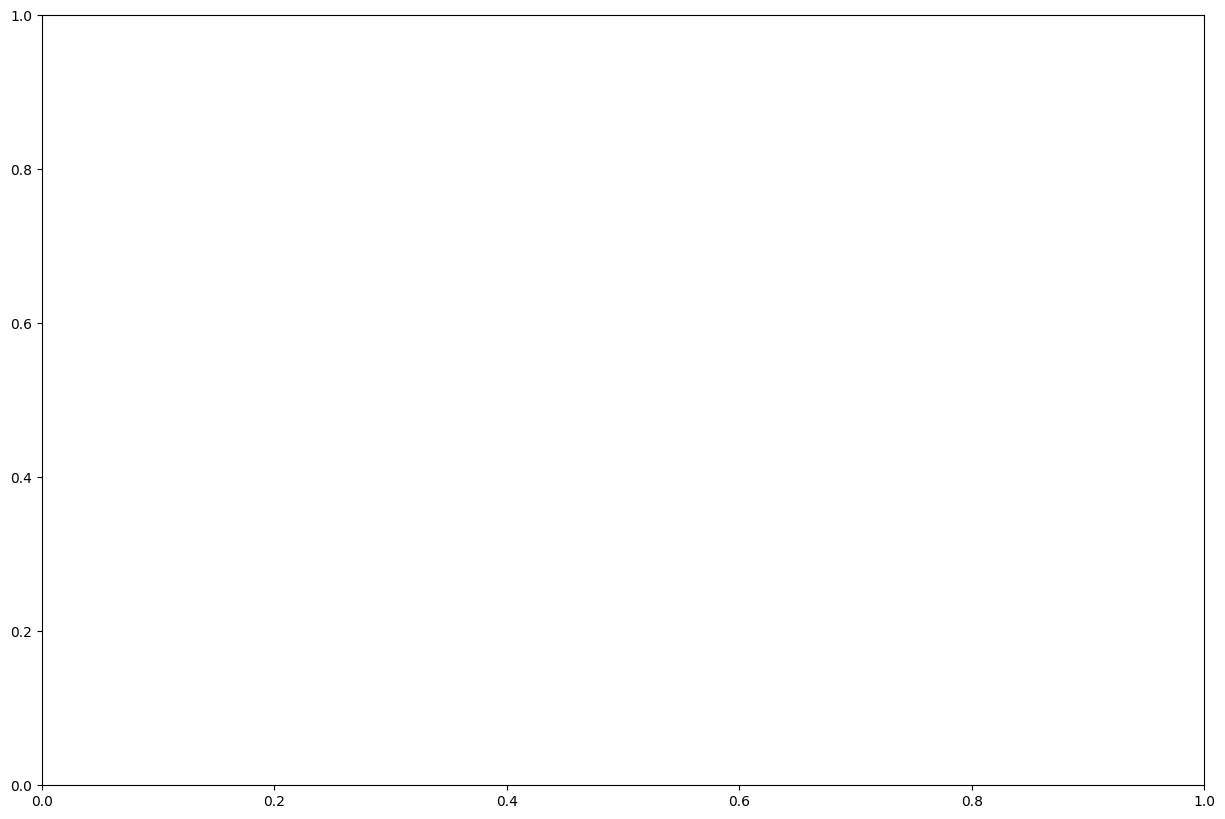

In [ ]:
fig, axes = plt.subplots(figsize=(15, 10))
sns.barplot(x='Category', y='Reviews', data=sorted_data, ax=axes)

plt.xticks(rotation=75)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

##### Exercise 3: How many apps are produced in each year category-wise ?

  * Create a `Year` column by slicing the values of `Last Updated` column and find the Year with most no. of apps produced

    **For example**, slice the year `2017` from `February 8, 2017`

  * Find the categories which have a consistent rating in each year

      **Hint:** `sns.countplot`

In [ ]:
# YOUR CODE HERE
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Or we can use
# df["Year"] = df["Last Updated"].str.extract(r',\s(\d{4})')
df['Year'] = df['Last Updated'].dt.year
df.head()

In [ ]:
# year with most number of apps produced
df.groupby("Year").size()
df["Year"].value_counts().idxmax()
df["Year"].value_counts()

##### Exercise 4: Identify the highest paid apps with a good rating

In [ ]:
# Highest paid app
highest_paid_app = df["Price"].idxmax()
df.loc[[highest_paid_app]]

In [ ]:
# YOUR CODE HERE
paid = df[df['Type']=='Paid']
paid.shape

good_rating_thres = 4.2

highest_rated_paid_apps = paid[paid['Rating'] >= good_rating_thres]

# Highhest paid apps with good rating
highest_rated_paid_apps.sort_values(by='Price')


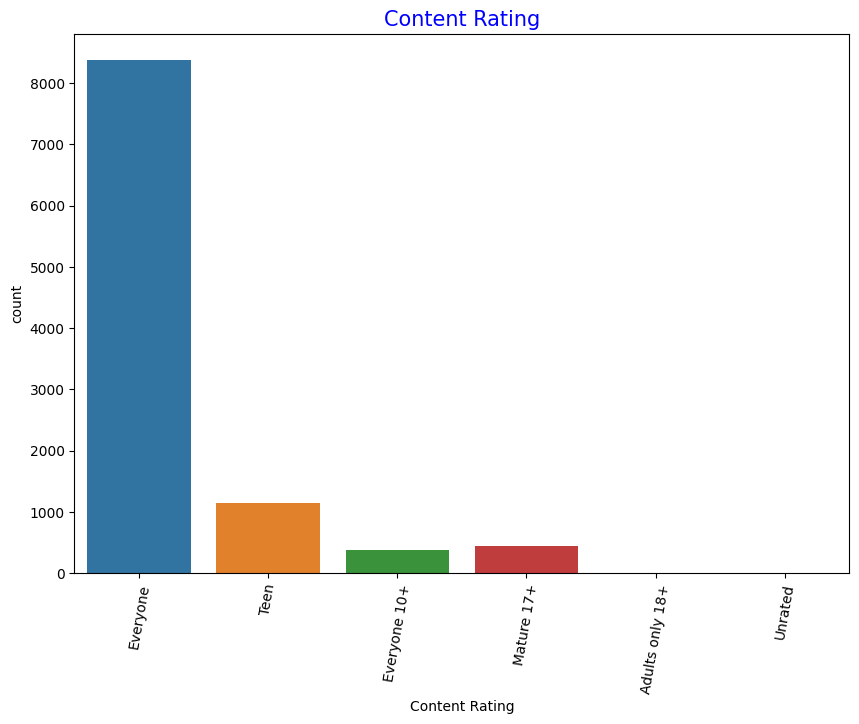

In [ ]:
fig, axes = plt.subplots(figsize=(10,7))
sns.countplot(data=df, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()

##### Exercise 5: Are the top-rated apps genuine ? How about checking reviews count of top-rated apps ?

In [ ]:
top_rated_apps_thres = 5
top_rated_apps = df[df["Rating"]==top_rated_apps_thres]

In [ ]:
# convert dtype of reviews to int
top_rated_apps["Reviews"] = top_rated_apps["Reviews"].astype(int)

top_rated_apps[top_rated_apps["Reviews"]<100]

<ipython-input-195-8b0ea7942a29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rated_apps["Reviews"] = top_rated_apps["Reviews"].astype(int)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,z_score,q_score,iqr_outliers
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,370000000.0,1000,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up,1.675459,4.8,True
612,American Girls Mobile Numbers,DATING,5.0,5,44000000.0,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up,1.675459,4.8,True
615,Awake Dating,DATING,5.0,2,700000000.0,100,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up,1.675459,4.8,True
633,Spine- The dating app,DATING,5.0,5,93000000.0,500,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up,1.675459,4.8,True
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,50000000.0,100,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up,1.675459,4.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,160000000.0,100,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up,1.675459,4.8,True
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,79000000.0,1000,Free,0.0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up,1.675459,4.8,True
10776,Monster Ride Pro,GAME,5.0,1,240000000.0,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up,1.675459,4.8,True
10820,Fr. Daoud Lamei,FAMILY,5.0,22,86000000.0,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up,1.675459,4.8,True


##### Exercise 6: If the number of reviews of an app is very low, what could be the reason for its top-rating ?

In [ ]:
# YOUR CODE HERE

##### Exercise 7: What is the 95% confidence interval for the rating of apps in the Google Play Store?

In [ ]:
# YOUR CODE HERE
mean_rating = df['Rating'].mean()
mean_rating
std_rating = df['Rating'].std()
std_rating

##### Exercise 8: Test if there is a statistically significant difference in the ratings between free and paid apps using a t-test

Steps:

* Set the null hypothesis and alternate hypothesis
* Separate the ratings of free and paid apps.
* Perform t-test: Use an independent samples t-test.
* Interpret results based on the p-value, decide whether to reject or fail to reject the null hypothesis.

In [ ]:
# YOUR CODE HERE